In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
boston_data = pd.read_csv('/content/BostonHousing1.csv')

In [3]:
boston_data.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
boston_data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
boston_data.info()
boston_data.isnull().sum()
boston_data._data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


BlockManager
Items: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=506, step=1)
NumericBlock: [ 0  1  2  4  5  6  7 10 11 12 13], 11 x 506, dtype: float64
NumericBlock: [3 8 9], 3 x 506, dtype: int64

In [7]:
#drop
boston_data = boston_data.drop(columns='zn', axis=1)
boston_data.drop

<bound method DataFrame.drop of         crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0    0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1    0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2    0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3    0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4    0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
..       ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
501  0.06263  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
0    396.90   4.98  24.0  
1

In [8]:
#replace missing value in age column with mean value
boston_data['age'].fillna(boston_data['age'].mean(),inplace=True)
boston_data['rad'].mode()

0    24
Name: rad, dtype: int64

In [9]:
#only want 24 value and not 0
print(boston_data['rad'].mode()[0])

24


In [10]:
#replace missing value in embarked column with mode value
boston_data['rad'].fillna(boston_data['rad'].mode(),inplace=True)
boston_data.isnull().sum()

crim       0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
boston_data.describe()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
print(boston_data.value_counts())
boston_data = boston_data.drop(columns='medv', axis=1)
print(boston_data.drop)

crim      indus  chas  nox    rm     dis      rad  tax  ptratio  b       lstat  medv
0.00632   2.31   0     0.538  6.575  4.0900   1    296  15.3     396.90  4.98   24.0    1
1.00245   8.14   0     0.538  6.674  4.2390   4    307  21.0     380.23  11.98  21.0    1
1.38799   8.14   0     0.538  5.950  3.9900   4    307  21.0     232.60  27.71  13.2    1
1.35472   8.14   0     0.538  6.072  4.1750   4    307  21.0     376.73  13.04  14.5    1
1.34284   19.58  0     0.605  6.066  1.7573   5    403  14.7     353.89  6.43   24.3    1
                                                                                       ..
0.11027   5.13   0     0.453  6.456  7.2255   8    284  19.7     396.90  6.73   22.2    1
0.10959   11.93  0     0.573  6.794  2.3889   1    273  21.0     393.45  6.48   22.0    1
0.10793   8.56   0     0.520  6.195  2.7778   5    384  20.9     393.49  13.00  21.7    1
0.10659   1.91   0     0.413  5.936  10.5857  4    334  22.0     376.04  5.57   20.6    1
88.97620  18.10

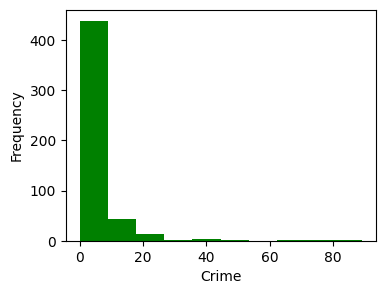

In [20]:
#plot graph
plt.figure(figsize=(4,3))
plt.hist(boston_data['crim'], color='g');
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.show()

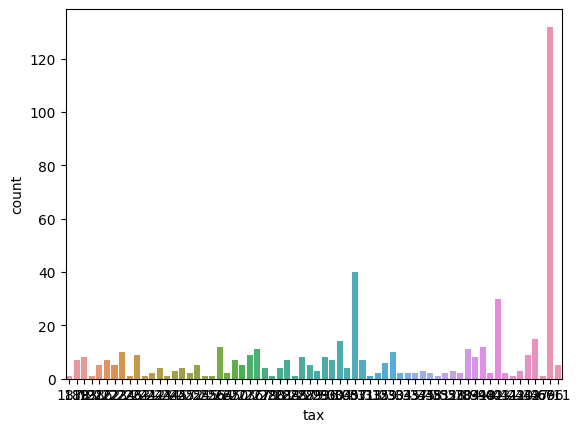

<Figure size 200x300 with 0 Axes>

In [23]:
sns.countplot(data=boston_data, x='tax')
plt.figure(figsize=(2,3))
plt.show()

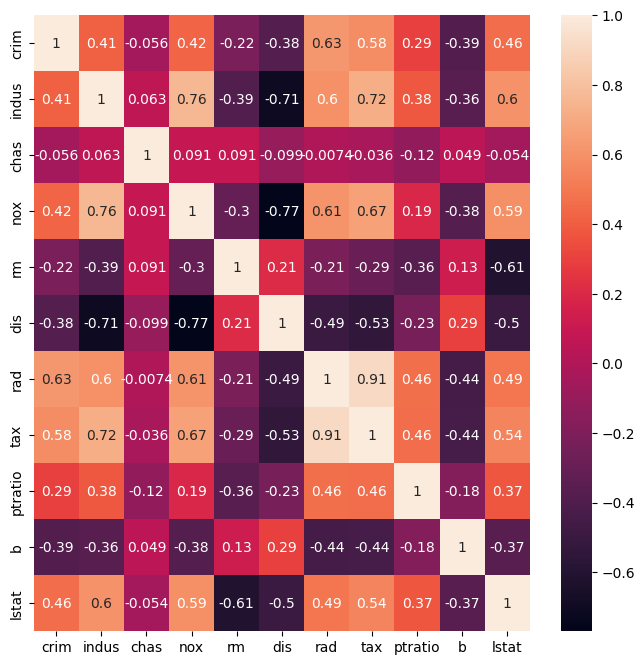

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(boston_data.corr(),annot=True)
plt.show()

In [29]:
print(boston_data.corr())

             crim     indus      chas       nox        rm       dis       rad  \
crim     1.000000  0.406583 -0.055892  0.420972 -0.219247 -0.379670  0.625505   
indus    0.406583  1.000000  0.062938  0.763651 -0.391676 -0.708027  0.595129   
chas    -0.055892  0.062938  1.000000  0.091203  0.091251 -0.099176 -0.007368   
nox      0.420972  0.763651  0.091203  1.000000 -0.302188 -0.769230  0.611441   
rm      -0.219247 -0.391676  0.091251 -0.302188  1.000000  0.205246 -0.209847   
dis     -0.379670 -0.708027 -0.099176 -0.769230  0.205246  1.000000 -0.494588   
rad      0.625505  0.595129 -0.007368  0.611441 -0.209847 -0.494588  1.000000   
tax      0.582764  0.720760 -0.035587  0.668023 -0.292048 -0.534432  0.910228   
ptratio  0.289946  0.383248 -0.121515  0.188933 -0.355501 -0.232471  0.464741   
b       -0.385064 -0.356977  0.048788 -0.380051  0.128069  0.291512 -0.444413   
lstat    0.455621  0.603800 -0.053929  0.590879 -0.613808 -0.496996  0.488676   

              tax   ptratio

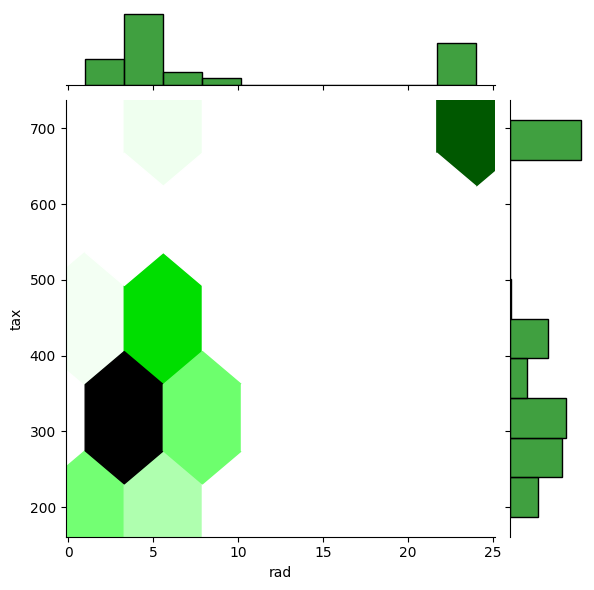

In [36]:
sns.jointplot(x='rad', y='tax', data=boston_data,kind='hex',color='g')
plt.show()

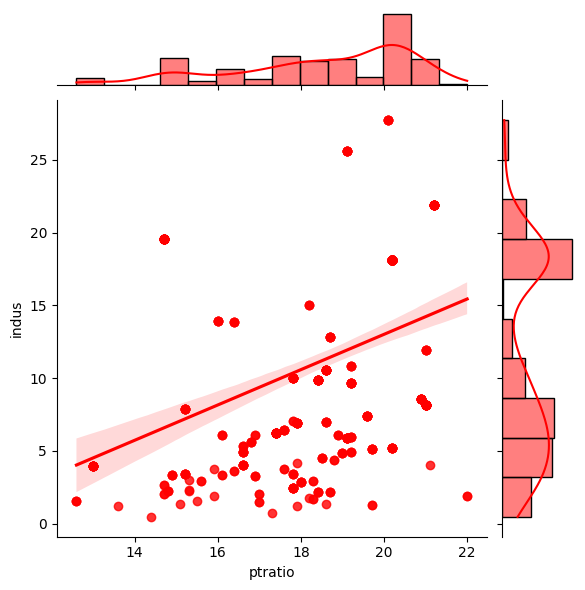

In [38]:
sns.jointplot(x='ptratio',y='indus',data=boston_data,kind='reg',color='r')
plt.show()

In [40]:
#training
X=boston_data.drop('tax', axis=1)
y= boston_data['tax']
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 10)
(167, 10)
(339,)
(167,)


In [41]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

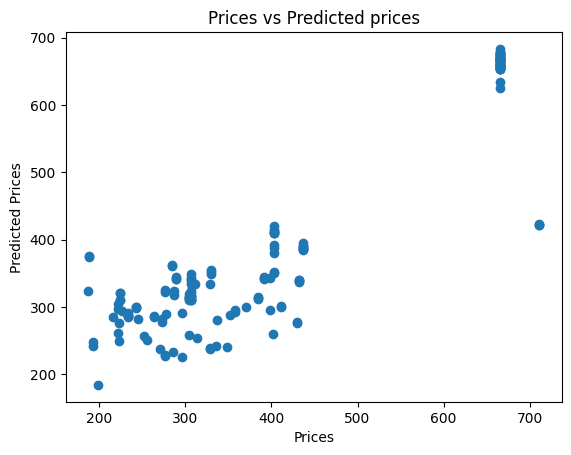

In [42]:
predictions= lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted prices')
plt.show()

In [43]:
lin_reg.score(X_test, y_test)
error= y_test-predictions

#accuracy
accuracy_score= sklearn.metrics.mean_squared_error(y_test, predictions)
print("Accuracy:",accuracy_score)

Accuracy: 4423.666343731508
